In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\Sujal Karmakar\Desktop\Desktop\Data Analyst\Python\python_data_analytics_project\DataAnalysis practice with my Instagram scraped dataset\ig_profile_data\all_usernames_profile_data_copy.xlsx'

df = pd.read_excel(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12531 entries, 0 to 12530
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Username             12531 non-null  object 
 1   Full Name            12198 non-null  object 
 2   Number of Posts      12516 non-null  float64
 3   Followers Count      12531 non-null  int64  
 4   Following Count      11876 non-null  float64
 5   Profile Bio          12293 non-null  object 
 6   Thread Link          4986 non-null   object 
 7   External Link        12531 non-null  object 
 8   Email in Bio         2326 non-null   object 
 9   Profile Picture URL  12526 non-null  object 
 10  Is Verified          12531 non-null  bool   
 11  Professional Label   7049 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 1.1+ MB


In [3]:
professionals = df[df['Professional Label'].notnull()].copy() # include usernames with professional lables

top_professionals = professionals.sort_values(by='Followers Count', ascending=False)

top_professionals = top_professionals[top_professionals['Profile Bio'].notnull()].copy()

top_professionals = top_professionals[['Username', 'Followers Count', 'Professional Label', 'Profile Bio', 'Is Verified']]

In [4]:
from millify import millify

label_grouped = top_professionals.groupby('Professional Label').agg(
    Mean_Follower_Count=('Followers Count', 'mean')
).reset_index()

# label_grouped = label_grouped.rename(columns={'Followers Count': 'Mean Follower Count'}) alternative method

label_grouped = label_grouped.sort_values(by='Mean_Follower_Count', ascending=False)

label_grouped = label_grouped.head(15)

label_grouped.set_index("Professional Label", inplace=True)


label_grouped

,Mean_Follower_Count
Professional Label,
Computers (brand),7.400000e+06
Political party,7.200000e+06
Massage therapist,6.500000e+06
Chicken shop,6.450000e+06
Gaming video creator,5.823770e+06
Teacher,5.300000e+06
Video game,4.099999e+06
Sports event,3.400000e+06
Scientist,3.026500e+06


C:\Users\Sujal Karmakar\AppData\Local\Temp\ipykernel_35868\3160287667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean_Follower_Count', y=label_grouped.index, data=label_grouped, palette="magma_r")


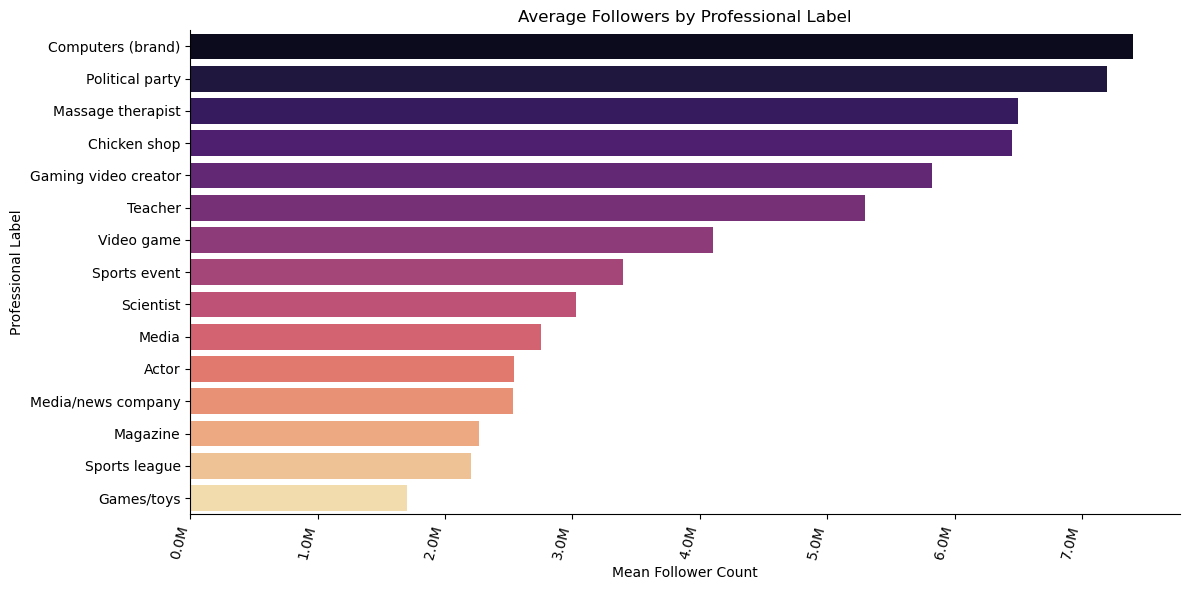

In [6]:
from matplotlib.ticker import FuncFormatter

label_grouped = label_grouped.sort_values(by='Mean_Follower_Count', ascending=True)

cmap = sns.color_palette("flare", as_cmap=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Mean_Follower_Count', y=label_grouped.index, data=label_grouped, palette="magma_r")


# Add labels and title
plt.xlabel('Mean Follower Count')
plt.ylabel('Professional Label')
plt.title('Average Followers by Professional Label')

plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Apply FuncFormatter to display x-axis ticks in millions
formatter = FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=75, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

